<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-8-pandas-sql/Pandas_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function to automatic merge and fill missing values
This quest is following the quest "Pandas merge and fill missing values"


## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
def merge_and_fill(DataFrameMain, DataFrameOpinion):
  NewDataFrame = pd.merge(DataFrameMain, DataFrameOpinion, how='left', left_on='DATE', right_on='date')
  #drop extra date col with na
  NewDataFrame.drop('date', axis=1, inplace=True)
  #fill weather code na with mean
  mean_weather_column = NewDataFrame['WEATHER_CODE_EVENING'].median()
  NewDataFrame['WEATHER_CODE_EVENING'].fillna(mean_weather_column, 
                                      inplace = True) 
  #fill snow with zero (all records are zero)
  NewDataFrame['TOTAL_SNOW_MM'].fillna(0, inplace = True)
  #fill uv index with median by month
  NewDataFrame['UV_INDEX'] = NewDataFrame.groupby(NewDataFrame.DATE.astype('datetime64').dt.month)['UV_INDEX'].apply(lambda x: x.fillna(x.median()))
  #forwrd fill sun hour, then backfill for any excluded
  NewDataFrame['SUNHOUR'].fillna(method = 'ffill', inplace = True)
  NewDataFrame['SUNHOUR'].fillna(method = 'bfill', inplace = True)  
  #fill opinion with 'unknown'
  NewDataFrame['OPINION'].fillna('unknown', inplace = True) 
  #add month date year
  NewDataFrame['MONTH'] = NewDataFrame['DATE'].apply(lambda x: x[5:7])
  NewDataFrame['DAY'] = NewDataFrame['DATE'].apply(lambda x: x[8:])
  NewDataFrame['YEAR'] = NewDataFrame['DATE'].apply(lambda x: x[0:4])
  return NewDataFrame



## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [ ]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv
dfs = []
for year in range(2010, 2019):
  link_main = f"https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_{year}.csv"
  link_opinion = f"https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_{year}.csv"
  DataFrameMain = pd.read_csv(link_main)
  DataFrameOpinion = pd.read_csv(link_opinion)
  df = merge_and_fill(DataFrameMain, DataFrameOpinion)
  dfs.append(df)

df_all = pd.concat(dfs)

In [ ]:
df_all.isna().sum()

DATE                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
TEMPERATURE_MORNING_C     0
TEMPERATURE_NOON_C        0
TEMPERATURE_EVENING_C     0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
HEATINDEX_MAX_C           0
DEWPOINT_MAX_C            0
WINDTEMP_MAX_C            0
WEATHER_CODE_EVENING      0
TOTAL_SNOW_MM             0
UV_INDEX                  0
SUNHOUR                   0
OPINION                   0
MONTH                     0
DAY                       0
YEAR                      0
dtype: int64

## Add 2019

In [ ]:
link2019 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_2019 = pd.read_csv(link2019)
df_2019['YEAR'] = df_2019['DATE'].apply(lambda x: x[0:4])

df_all = df_all.append(df_2019)
print(df_all.tail(1))
df_all.info()

           DATE  MAX_TEMPERATURE_C  ...  WEATHER_CODE_MORNING  WEATHER_CODE_NOON
364  2019-12-31                 10  ...                 113.0              143.0

[1 rows x 25 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5842 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    5842 non-null   object 
 1   MAX_TEMPERATURE_C       5842 non-null   int64  
 2   MIN_TEMPERATURE_C       5842 non-null   int64  
 3   WINDSPEED_MAX_KMH       5842 non-null   int64  
 4   TEMPERATURE_MORNING_C   5842 non-null   int64  
 5   TEMPERATURE_NOON_C      5842 non-null   int64  
 6   TEMPERATURE_EVENING_C   5842 non-null   int64  
 7   PRECIP_TOTAL_DAY_MM     5842 non-null   float64
 8   HUMIDITY_MAX_PERCENT    5842 non-null   int64  
 9   VISIBILITY_AVG_KM       5842 non-null   float64
 10  PRESSURE_MAX_MB         5842 non-null   int64  
 11  CLOUDCOVER_AVG_

# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 10 seasonality for the 10 summers/winters alternance.


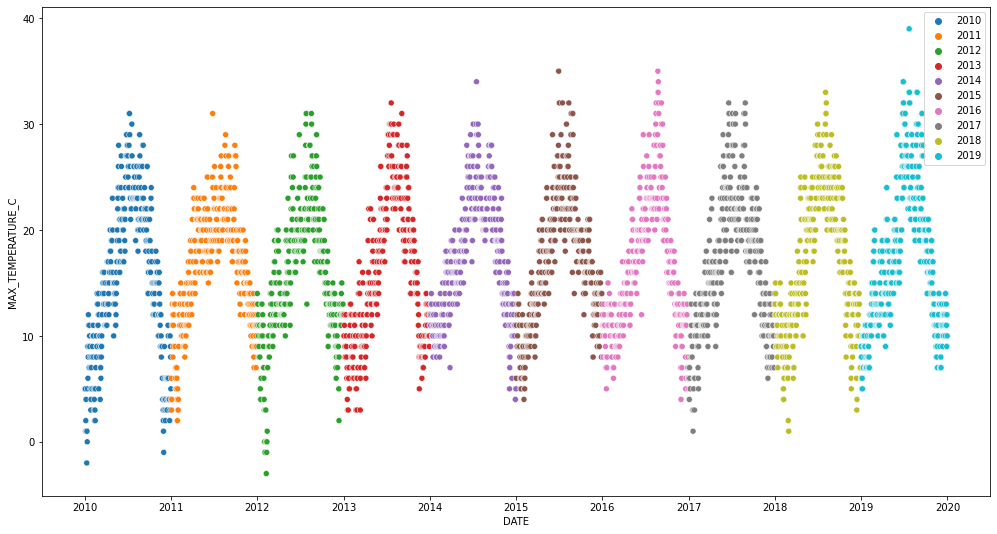

In [ ]:
plt.figure(figsize=(17,9))
df_all['DATE'] = pd.to_datetime(df_all['DATE'])
sns.scatterplot(x='DATE', y='MAX_TEMPERATURE_C', data=df_all, hue='YEAR')
plt.legend(loc='best')